<a href="https://colab.research.google.com/github/DavidPachis/dataScience/blob/main/proyecto/notebooks/2Entrega_TaxisNYC_CDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto CDA
Análisis exploratorio de los datos de taxis de Nueva york


## Instalaciones
Librerias necesarias para el desarrollo del taller

In [1]:
#pip install pynvml

In [2]:
!pip install geopandas
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 16.7 MB 368 kB/s 
     |████████████████████████████████| 6.3 MB 11.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 2.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 49.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 51.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 54.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████

In [3]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=d2f559536676c862fa4f4a500cdbbb2ebea70df3e578303ec67591c6966daf25
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## Importaciones de las librerias que se usaran en el análisis


In [4]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

In [5]:
# Importing libraries
from google.colab import drive
import numpy as np
import pandas as pd
import zipfile
import wget

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## EDA
Lectura de archivos de taxis, json, y csvs, limpieza y ajustes necesarios para el análisis de los Datos.

### Lectura

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


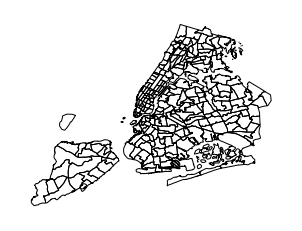

In [6]:
# Load the json file with county coordinates
json="https://raw.githubusercontent.com/DavidPachis/dataScience/main/proyecto/data/NY_map_zones.json"
geoData = gpd.read_file(json)
# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));

In [7]:
#path="/content/drive/MyDrive/Colab Notebooks/CDA/yellow_tripdata_2020-06.csv"
file=wget.download('https://github.com/DavidPachis/dataScience/raw/main/proyecto/data/yellow_tripdata_2020-06.zip')
with zipfile.ZipFile('/content/yellow_tripdata_2020-06.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
  

In [8]:
df=pd.read_csv('/content/yellow_tripdata_2020-06.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-06-01 00:31:23,2020-06-01 00:49:58,1.0,3.6,1.0,N,140,68,1.0,15.5,3.0,0.5,4.00,0.0,0.3,23.30,2.5
1,1.0,2020-06-01 00:42:50,2020-06-01 01:04:33,1.0,5.6,1.0,N,79,226,1.0,19.5,3.0,0.5,2.00,0.0,0.3,25.30,2.5
2,1.0,2020-06-01 00:39:51,2020-06-01 00:49:09,1.0,2.3,1.0,N,238,116,2.0,10.0,0.5,0.5,0.00,0.0,0.3,11.30,0.0
3,1.0,2020-06-01 00:56:13,2020-06-01 01:11:38,1.0,5.3,1.0,N,141,116,2.0,17.5,3.0,0.5,0.00,0.0,0.3,21.30,2.5
4,1.0,2020-06-01 00:16:41,2020-06-01 00:29:30,1.0,4.4,1.0,N,186,75,1.0,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5


In [10]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

### Limpeza y EDA de los datos

#### **fare amount**

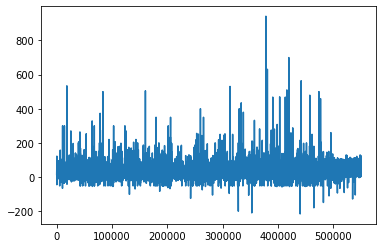

In [11]:
 df['fare_amount'].plot()

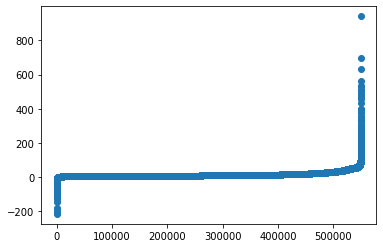

In [12]:
fares =  df['fare_amount'].sort_values()
y= list(np.arange(0,len(fares)))
plt.scatter(y,fares)

In [13]:
df = df.drop(df.index[df['fare_amount'] < 0.001])

In [14]:
tarifa = df['fare_amount']

In [15]:
tarifa.sort_values(ascending=True).tail(15)

412940    468.00
402829    469.50
457197    479.00
83585     500.00
473711    500.00
160286    505.00
160287    505.00
415783    509.70
415782    510.00
313149    530.50
18392     534.00
441601    563.79
380592    631.00
419346    699.50
377921    941.50
Name: fare_amount, dtype: float64

In [16]:
tarifa.sort_values(ascending=False).tail()

405370    0.01
169772    0.01
451886    0.01
119595    0.01
66841     0.01
Name: fare_amount, dtype: float64

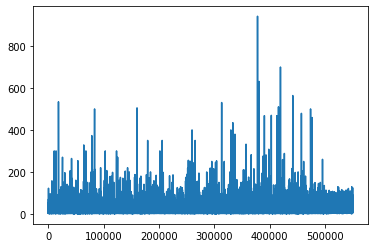

In [17]:
 df['fare_amount'].plot()

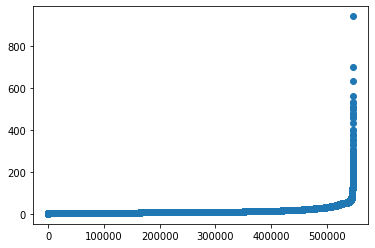

In [18]:
farest =  df['fare_amount'].sort_values()
y= list(np.arange(0,len(farest)))
plt.scatter(y,farest)

In [19]:
fares1= df.drop(df.index[df['fare_amount'] >70])

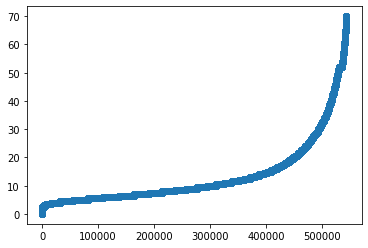

In [20]:
fares =  fares1['fare_amount'].sort_values()
y= list(np.arange(0,len(fares)))
plt.scatter(y,fares)

#### **pick up and drop off**

In [21]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

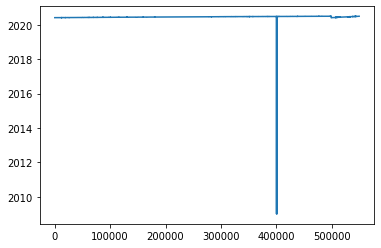

In [22]:
 df['tpep_pickup_datetime'].plot()

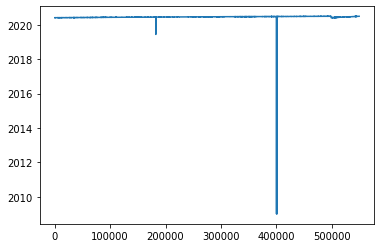

In [23]:
df['tpep_dropoff_datetime'].plot()

In [24]:
dates_pick = df['tpep_pickup_datetime']

In [25]:
dates_drop = df['tpep_dropoff_datetime']

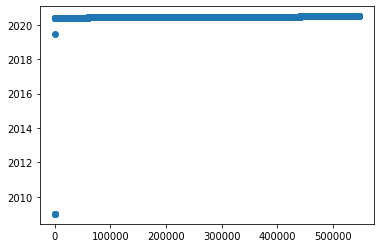

In [26]:
dates_drop2 = dates_drop.sort_values()
y= list(np.arange(0,len(dates_drop2)))
plt.scatter(y,dates_drop2)

In [27]:
dates_pick.sort_values(ascending=False)

498930   2020-07-01 00:02:40
498933   2020-07-01 00:00:10
498979   2020-06-30 23:58:51
498724   2020-06-30 23:58:38
498758   2020-06-30 23:58:38
                 ...        
100      2020-05-31 23:45:47
82       2020-05-31 17:00:08
401428   2009-01-01 01:04:51
400495   2009-01-01 00:35:02
400494   2009-01-01 00:02:59
Name: tpep_pickup_datetime, Length: 546806, dtype: datetime64[ns]

In [28]:
dates_drop.sort_values(ascending=False)

499023   2020-07-01 18:09:18
495206   2020-07-01 17:57:06
493053   2020-07-01 17:30:25
494734   2020-07-01 17:21:02
493794   2020-07-01 16:36:31
                 ...        
132      2020-06-01 00:04:27
182427   2019-06-11 06:17:55
401428   2009-01-01 01:20:53
400495   2009-01-01 00:45:12
400494   2009-01-01 00:07:40
Name: tpep_dropoff_datetime, Length: 546806, dtype: datetime64[ns]

In [29]:
def outliersDate(x):
  if x < pd.Timestamp(2020, 1, 1,0):
    x = x.replace(year=2020,month=6)
    return(x)
  else:
    return(x)

In [30]:
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(outliersDate)

In [31]:
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(outliersDate)

In [32]:
dates_drop = df['tpep_dropoff_datetime']
dates_pick = df['tpep_pickup_datetime']

In [33]:
dates_pick.sort_values(ascending=False)

498930   2020-07-01 00:02:40
498933   2020-07-01 00:00:10
498979   2020-06-30 23:58:51
498724   2020-06-30 23:58:38
498758   2020-06-30 23:58:38
                 ...        
499385   2020-06-01 00:00:00
132      2020-05-31 23:59:59
92       2020-05-31 23:59:50
100      2020-05-31 23:45:47
82       2020-05-31 17:00:08
Name: tpep_pickup_datetime, Length: 546806, dtype: datetime64[ns]

In [34]:
dates_drop.sort_values(ascending=False)

499023   2020-07-01 18:09:18
495206   2020-07-01 17:57:06
493053   2020-07-01 17:30:25
494734   2020-07-01 17:21:02
493794   2020-07-01 16:36:31
                 ...        
499385   2020-06-01 00:07:00
499387   2020-06-01 00:06:43
92       2020-06-01 00:04:46
141      2020-06-01 00:04:41
132      2020-06-01 00:04:27
Name: tpep_dropoff_datetime, Length: 546806, dtype: datetime64[ns]

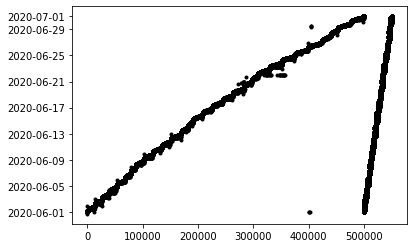

In [35]:
dates_pick.plot(style='k.')

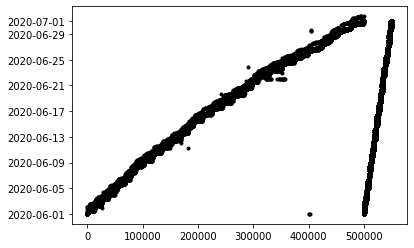

In [36]:
dates_drop.plot(style='k.')

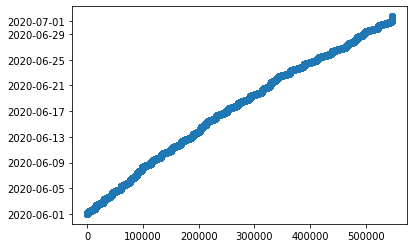

In [37]:
dates_drop = dates_drop.sort_values()
y= list(np.arange(0,len(dates_drop)))
plt.scatter(y,dates_drop)

#### **Passanger_count**

In [38]:
pasajeros = df['passenger_count']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


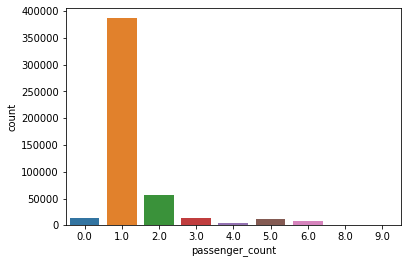

In [39]:
sns.countplot(pasajeros)

In [40]:
pasajeros.sort_values(ascending=False)

56414     9.0
260778    9.0
282989    8.0
165522    6.0
87519     6.0
         ... 
549755    NaN
549756    NaN
549757    NaN
549758    NaN
549759    NaN
Name: passenger_count, Length: 546806, dtype: float64

In [41]:
pasajeros.tail(50721)

498874    3.0
498875    2.0
498876    1.0
498877    1.0
498878    1.0
         ... 
549755    NaN
549756    NaN
549757    NaN
549758    NaN
549759    NaN
Name: passenger_count, Length: 50721, dtype: float64

In [42]:
pasajeros.round()

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
549755    NaN
549756    NaN
549757    NaN
549758    NaN
549759    NaN
Name: passenger_count, Length: 546806, dtype: float64

Imputacion basada en la distribucion de los datos originales. 

In [43]:
index = df[df.passenger_count.isna()].index
value = np.random.normal(loc=df.passenger_count.mean(), scale=df.passenger_count.std(), size=df.passenger_count.isna().sum())

df.passenger_count.fillna(pd.Series(value, index=index), inplace=True)

In [44]:
pasajeros=pasajeros.round()

In [45]:
df['passenger_count']=df['passenger_count'].round().abs()

In [46]:
pasajeros.tail(50721)

498874    3.0
498875    2.0
498876    1.0
498877    1.0
498878    1.0
         ... 
549755    2.0
549756    2.0
549757    2.0
549758    2.0
549759   -0.0
Name: passenger_count, Length: 50721, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


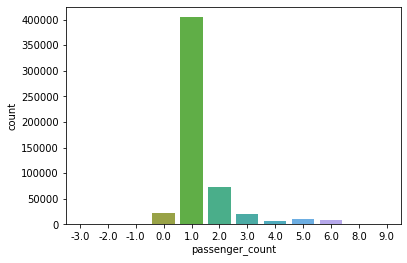

In [47]:
sns.countplot(pasajeros)

#### **Trip Distance**

In [48]:
def fix_mil(x):
  if x > 1000:
    return(x/1000)
  else:
    return(x)
def fix_cientosmil(x):
  if x > 100000:
    return(x/10000)
  else:
    return(x)

In [49]:
distance = df['trip_distance']

In [50]:
distance.sort_values(ascending=True)

179090         0.00
164269         0.00
20059          0.00
537686         0.00
290257         0.00
            ...    
543614     14801.92
163579     22543.99
541543     56474.96
499077     97878.35
539236    220386.23
Name: trip_distance, Length: 546806, dtype: float64

In [51]:
distance.sort_values(ascending=True).tail(25)

252941        89.00
317832        95.68
302137        96.50
412940        98.00
303960        98.80
357174       114.30
64072        125.50
402829       135.20
441601       144.10
343826       151.33
333351       155.10
476567       167.10
390319       167.50
457197       168.70
313149       187.90
377921       191.80
380592       240.70
179521       259.13
419346       270.32
14010        441.60
543614     14801.92
163579     22543.99
541543     56474.96
499077     97878.35
539236    220386.23
Name: trip_distance, dtype: float64

In [52]:
fare = df['fare_amount']

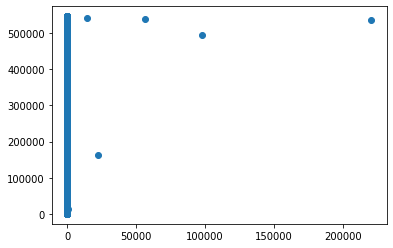

In [53]:
y= list(np.arange(0,len(distance)))
plt.scatter(distance,y)

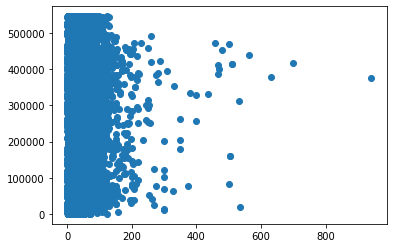

In [54]:
y= list(np.arange(0,len(fare)))
plt.scatter(abs(fare),y)

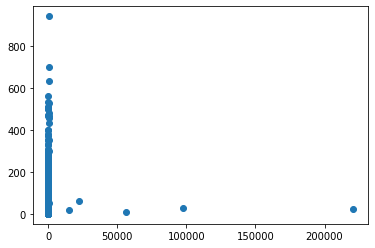

In [55]:
plt.scatter(distance,fare)

In [56]:
df['trip_distance'] = df['trip_distance'].apply(fix_cientosmil)

In [57]:
df['trip_distance'] = df['trip_distance'].apply(fix_mil)

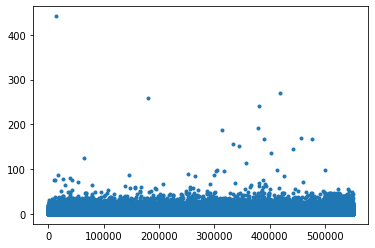

In [58]:
distance.plot(style='.')

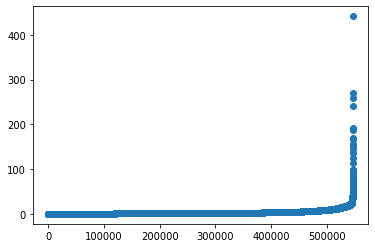

In [59]:
y= list(np.arange(0,len(distance)))
plt.scatter(y,distance.sort_values())

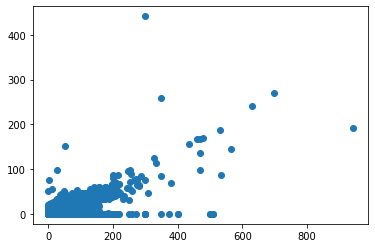

In [60]:
plt.scatter(fare,distance)

In [61]:
distance.sort_values(ascending=True).tail()

377921    191.80
380592    240.70
179521    259.13
419346    270.32
14010     441.60
Name: trip_distance, dtype: float64

#### **payment_type**

In [62]:
pago = df['payment_type']

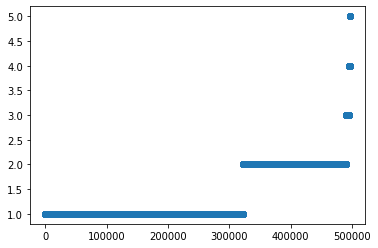

In [63]:
pago = pago.sort_values()
y= list(np.arange(0,len(pago)))
plt.scatter(y,pago)

In [64]:
pago.sort_values(ascending=True).tail(50000)

499595   NaN
499596   NaN
499597   NaN
499598   NaN
499599   NaN
          ..
549755   NaN
549756   NaN
549757   NaN
549758   NaN
549759   NaN
Name: payment_type, Length: 50000, dtype: float64

In [65]:
index = df[df.payment_type.isna()].index
value = np.random.normal(loc=df.payment_type.mean(), scale=df.payment_type.std(), size=df.payment_type.isna().sum())

df.payment_type.fillna(pd.Series(value, index=index), inplace=True)

In [66]:
pago = df['payment_type']
df['payment_type']=df['payment_type'].round().abs()

In [67]:
pago.sort_values(ascending=True).tail(50000)

81908     2.0
81907     2.0
422229    2.0
81906     2.0
268710    2.0
         ... 
150901    5.0
150858    5.0
150913    5.0
150838    5.0
150888    5.0
Name: payment_type, Length: 50000, dtype: float64

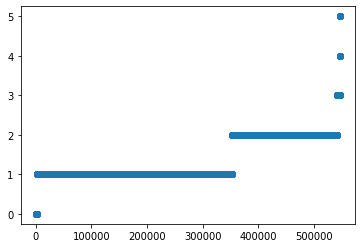

In [68]:
pago = pago.sort_values().round().abs()
y= list(np.arange(0,len(pago)))
plt.scatter(y,pago)

#### **mta_tax**

In [69]:
tax = df['mta_tax']

In [70]:
tax.sort_values(ascending=True)

416793    0.0
12476     0.0
12475     0.0
263667    0.0
283251    0.0
         ... 
184005    0.5
184006    0.5
184001    0.5
549759    0.5
486537    3.3
Name: mta_tax, Length: 546806, dtype: float64

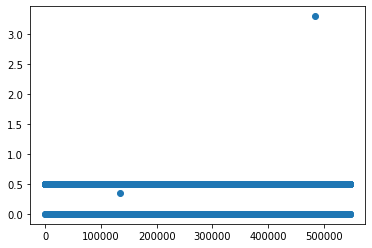

In [71]:
y= list(np.arange(0,len(tax)))
plt.scatter(y,abs(tax))

In [72]:
def taxes(x):
  if x > 0.5:
    x=0.5
    return(x)
  elif (x < 0.5):
    x=0
    return(x)
  else:
    return(x)

In [73]:
df['mta_tax'] = df['mta_tax'].apply(taxes)

In [74]:
tax.sort_values(ascending=True)

306505    0.0
263667    0.0
12476     0.0
12475     0.0
536365    0.0
         ... 
183994    0.5
183993    0.5
183992    0.5
184006    0.5
549759    0.5
Name: mta_tax, Length: 546806, dtype: float64

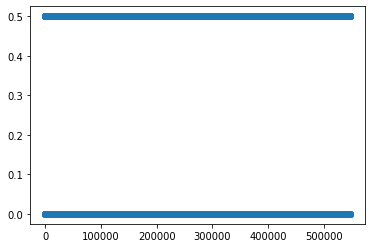

In [75]:
y= list(np.arange(0,len(tax)))
plt.scatter(y,abs(tax))

#### **tip**

In [76]:
tip = df['tip_amount']

In [77]:
tip.sort_values(ascending=True)

549759      0.00
261683      0.00
261682      0.00
261681      0.00
261678      0.00
           ...  
380592    274.51
393291    282.80
281726    300.00
550       300.00
70960     422.68
Name: tip_amount, Length: 546806, dtype: float64

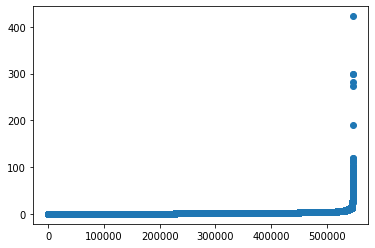

In [78]:

y= list(np.arange(0,len(tip)))
plt.scatter(y,tip.sort_values())

In [79]:
def tips_fix(x):
  if x > 299:
    return(x/100)
  else:
    return(x)

In [80]:
df['tip_amount'] = df['tip_amount'].apply(tips_fix)

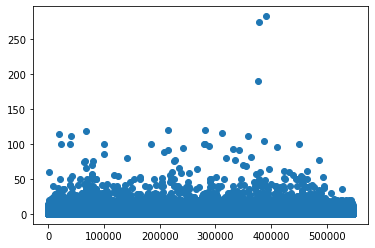

In [81]:
y= list(np.arange(0,len(tip)))
plt.scatter(y,tip)

#### **tolls** 

In [82]:
tolls = df['tolls_amount']

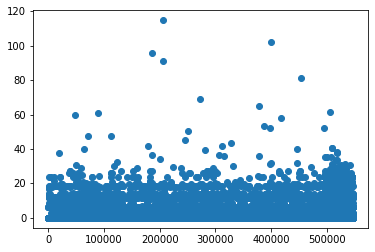

In [83]:
y= list(np.arange(0,len(tolls)))
plt.scatter(y,tolls)

In [84]:
tolls.sort_values(ascending=True).tail(10)

47793      60.00
89684      61.00
509014     61.20
380976     64.87
274504     69.00
457197     81.48
207065     91.25
187257     95.80
402829    102.16
207064    114.75
Name: tolls_amount, dtype: float64

In [85]:
df = df.drop(df.index[df['tolls_amount'] > 110])

In [86]:
tolls = df['tolls_amount']

In [87]:
tolls.sort_values(ascending=True).tail(10)

419346     57.99
47793      60.00
89684      61.00
509014     61.20
380976     64.87
274504     69.00
457197     81.48
207065     91.25
187257     95.80
402829    102.16
Name: tolls_amount, dtype: float64

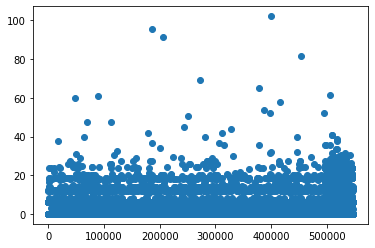

In [88]:
y= list(np.arange(0,len(tolls)))
plt.scatter(y,tolls)

#### **improvement_surcharge**

In [89]:
sub = df['improvement_surcharge']

In [90]:
sub.sort_values(ascending=True)

118090    0.0
402774    0.0
337624    0.0
143809    0.0
143811    0.0
         ... 
183419    0.3
183418    0.3
183417    0.3
183431    0.3
549759    0.3
Name: improvement_surcharge, Length: 546805, dtype: float64

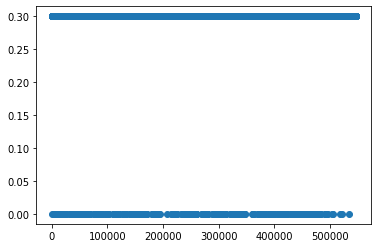

In [91]:
y= list(np.arange(0,len(sub)))
plt.scatter(y,sub)

In [92]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

#### **Drop columns**

Arreglamos los tipos de las columnas, para poder realizar operaciones futuras

In [93]:
df["passenger_count"] = df["passenger_count"].astype(int)
df["payment_type"] = df["payment_type"].astype(int)
df['congestion_surcharge'] = df['congestion_surcharge'].astype(int)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [94]:
df['PUDate'] = df['tpep_pickup_datetime'].dt.date
df['PUTime'] = df['tpep_pickup_datetime'].dt.hour
df['DODate'] = df['tpep_dropoff_datetime'].dt.date
df['DOTime'] = df['tpep_dropoff_datetime'].dt.hour

Acá eliminamos las columnas que no ofrecen información caliosa para el negocio,
por ejemplo:
Columna vendor ID, no ofrece ningún tipo de valor, por el momento
las columnas de fecha de recogida y llegada ya las utilizamos para extraer fecha y tiempo de recogida y llegada, por esta razón las podemos eliminar

In [95]:
df.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','RatecodeID','store_and_fwd_flag'], axis=1, inplace=True)

In [96]:
df.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PUDate,PUTime,DODate,DOTime
0,1,3.6,140,68,1,15.5,3.0,0.5,4.00,0.0,0.3,23.30,2,2020-06-01,0,2020-06-01,0
1,1,5.6,79,226,1,19.5,3.0,0.5,2.00,0.0,0.3,25.30,2,2020-06-01,0,2020-06-01,1
2,1,2.3,238,116,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,0,2020-06-01,0,2020-06-01,0
3,1,5.3,141,116,2,17.5,3.0,0.5,0.00,0.0,0.3,21.30,2,2020-06-01,0,2020-06-01,1
4,1,4.4,186,75,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2,2020-06-01,0,2020-06-01,0


In [97]:
df.shape

(546805, 17)

In [98]:
df.dtypes

passenger_count            int64
trip_distance            float64
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge       int64
PUDate                    object
PUTime                     int64
DODate                    object
DOTime                     int64
dtype: object

Abrimos el dataset de zonas de Nueva York, que al igual que los demas archivos, se cargaron a un repositorio de github, para facilitar su acceso

In [99]:
path1="https://raw.githubusercontent.com/DavidPachis/dataScience/main/proyecto/data/zonesNY.csv"
zonesNY = pd.read_csv(path1)
zonesNY.head(10)

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
5,6,Staten Island,Arrochar
6,7,Queens,Astoria
7,8,Queens,Astoria Park
8,9,Queens,Auburndale
9,10,Queens,Baisley Park


Unimos los datasets para obtener el nombre de los barrios y zonas de recogida

In [100]:
df1 = df.set_index('PULocationID').join(zonesNY.set_index('LocationID'))
df1 = df1.rename(columns={'Borough':'PUBorough','Zone':'PUZone'})

Unimos los datasets para obtener el nombre de los barrios y zonas de llegada

In [101]:
df1 = df1.set_index('DOLocationID').join(zonesNY.set_index('LocationID'))
df1 = df1.rename(columns={'Borough':'DOBorough','Zone':'DOZone'})
df1 = df1.assign(count=1) 

Organizamos las columnas

In [102]:
df1 = df1[['PUDate','PUTime','PUBorough','PUZone','DODate','DOTime','DOBorough','DOZone','passenger_count','trip_distance','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','total_amount','count']]
df1.head(5)

,PUDate,PUTime,PUBorough,PUZone,DODate,DOTime,DOBorough,DOZone,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,count
1,2020-06-01,10,EWR,Newark Airport,2020-06-01,10,EWR,Newark Airport,1,0.00,1,50.00,0.0,0.5,10.16,0.0,0.3,0,60.96,1
1,2020-06-06,16,EWR,Newark Airport,2020-06-06,16,EWR,Newark Airport,3,0.00,1,92.00,0.0,0.0,0.00,0.0,0.3,0,92.30,1
1,2020-06-06,22,EWR,Newark Airport,2020-06-06,22,EWR,Newark Airport,6,0.06,1,3.00,0.5,0.5,0.86,0.0,0.3,0,7.11,1
1,2020-06-10,6,EWR,Newark Airport,2020-06-10,6,EWR,Newark Airport,3,0.00,3,0.01,0.0,0.0,0.00,0.0,0.3,0,0.31,1
1,2020-06-10,6,EWR,Newark Airport,2020-06-10,6,EWR,Newark Airport,3,0.00,1,65.00,0.0,0.0,0.00,0.0,0.3,0,65.30,1


## Analisis y desarrollo de preguntas de negocio 
Ya teniendo limpio y ordenado el Dataset procedemos a contestar las preguntas de negocio realizadas

### 1. ¿Cuáles son las zonas con menos y más afluencia de taxis? 
Hallamos las zonas de toma de taxi más populares, y las menos populares
tambiénn, lo discriminamos por recojida y dejada de pasajeros.

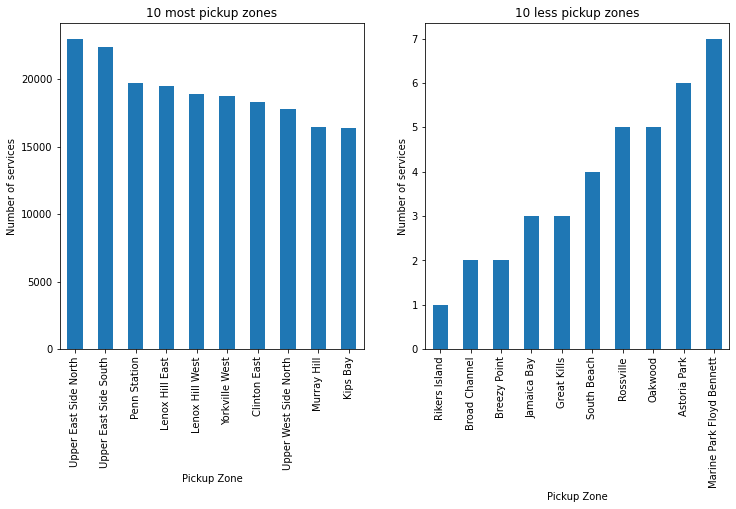

In [103]:
pt1 = df1.groupby(['PUZone']).size()
pt1head = pt1.sort_values(ascending = False).head(10)
pt1last = pt1.sort_values(ascending = False).tail(10)
fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(12,6))
pt1head.plot(kind = 'bar', ax = ax1 , ylabel ='Number of services' , xlabel ='Pickup Zone',)
ax1.set_title("10 most pickup zones")

pt1last.plot(kind = 'bar', ax = ax2 , ylabel ='Number of services' , xlabel ='Pickup Zone',)
ax2.set_title("10 less pickup zones")
ax2.invert_xaxis()


Graficamos también en diagrama de torta, para entender vizualmente la proporcion del top y tail 10 de las zonas de pick up de taxis. 

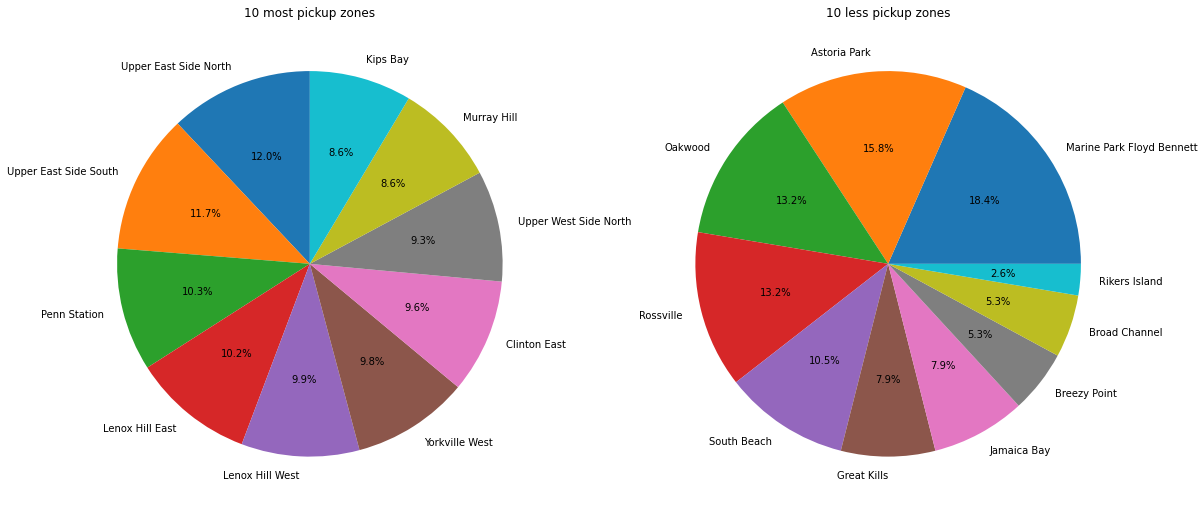

In [104]:

fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(19,12))
pt1head.plot(kind = 'pie', ax = ax1 , ylabel ='',startangle=90, autopct='%1.1f%%')
ax1.set_title("10 most pickup zones")


pt1last.plot(kind = 'pie', ax = ax2 , ylabel ='', autopct='%1.1f%%')
ax2.set_title("10 less pickup zones")


plt.show()

Hallamos las zonas de destino más populares

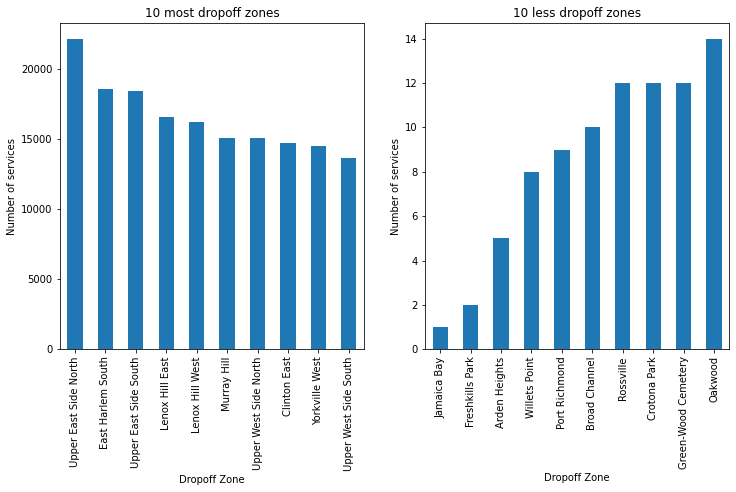

In [105]:
pt1a = df1.groupby(['DOZone']).size()
pt1heada = pt1a.sort_values(ascending = False).head(10)
pt1lasta = pt1a.sort_values(ascending = False).tail(10)

fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(12,6))
pt1heada.plot(kind = 'bar', ax = ax1 , ylabel ='Number of services' , xlabel ='Dropoff Zone',)
ax1.set_title("10 most dropoff zones")

pt1lasta.plot(kind = 'bar', ax = ax2 , ylabel ='Number of services' , xlabel ='Dropoff Zone',)
ax2.set_title("10 less dropoff zones")
ax2.invert_xaxis()

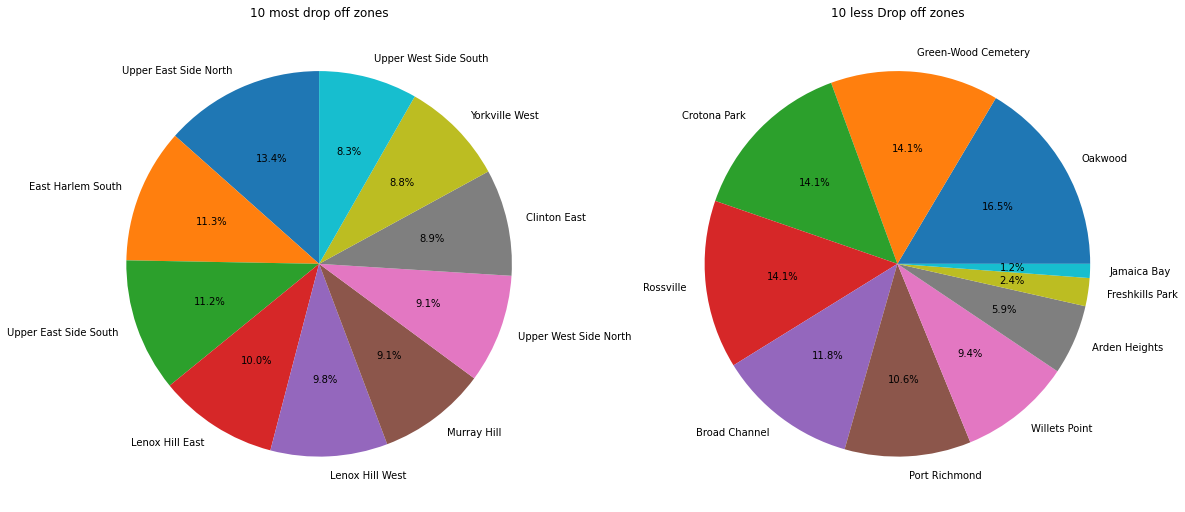

In [106]:
fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(19,12))
pt1heada.plot(kind = 'pie', ax = ax1 , ylabel ='',startangle=90, autopct='%1.1f%%')
ax1.set_title("10 most drop off zones")


pt1lasta.plot(kind = 'pie', ax = ax2 , ylabel ='', autopct='%1.1f%%')
ax2.set_title("10 less Drop off zones")

plt.show()

###2. ¿Existe una zona donde se pague más propina que las otras?

RTA: Donde más se da propina son los viajes al aeropuerto JFK pero en promedio se dan mas propinas en el aeropuerto de Newwark


PUZone
Newark Airport                  9.235417
Glen Oaks                       7.844776
JFK Airport                     5.367427
Flushing Meadows-Corona Park    4.681455
Breezy Point                    4.600000
LaGuardia Airport               4.183623
East Elmhurst                   3.336400
Cobble Hill                     3.138598
Pelham Bay Park                 3.001053
Sunset Park West                2.891722
Name: tip_amount, dtype: float64


Text(0.5, 1.0, '10 most tipped zones (average)')

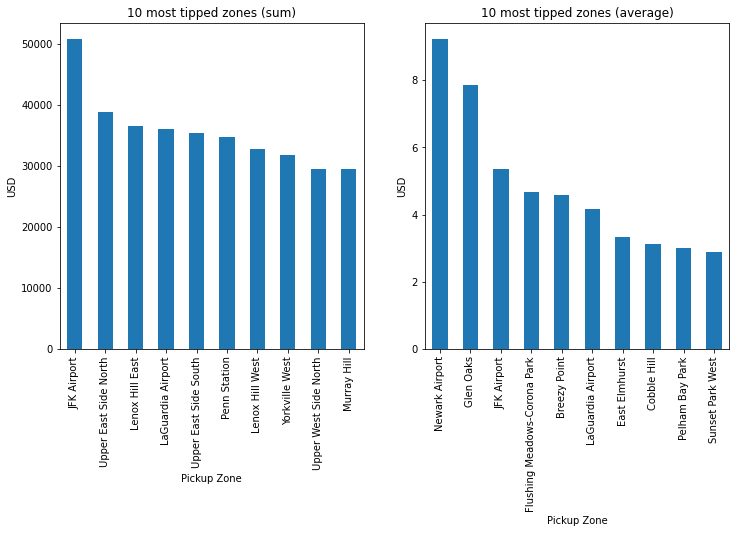

In [107]:
pt2a = df1.groupby(['PUZone']).agg({'tip_amount':sum})
pt2b = df1.groupby(['PUZone']).agg({'tip_amount':np.mean})
pt2a = pt2a['tip_amount'].sort_values(ascending = False).head(10)
pt2b = pt2b['tip_amount'].sort_values(ascending = False).head(10)

print(pt2b)
fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(12,6))
pt2a.plot(kind = 'bar', ax = ax1 , ylabel ='USD' , xlabel ='Pickup Zone',)
ax1.set_title("10 most tipped zones (sum)")

pt2b.plot(kind = 'bar', ax = ax2 , ylabel ='USD' , xlabel ='Pickup Zone',)
ax2.set_title("10 most tipped zones (average)")


### 3. ¿Cuál es la zona con más servicios de taxis en Nueva York? 
RTA: UPPER EAST SIDE NORTH

Text(0.5, 1.0, '10 Most Serviced Zones')

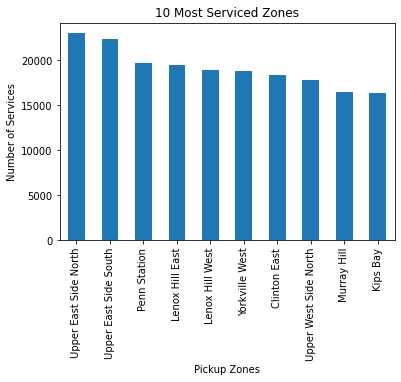

In [108]:
pt1head.plot(kind = 'bar')
plt.xlabel("Pickup Zones")
plt.ylabel("Number of Services")
plt.title("10 Most Serviced Zones")

### 4. ¿Cuál es la zona/hora de más recogidas en la ciudad, cuál sería la menos congestionada? 

PUZone                 PUTime
Upper East Side North  14        2201
                       13        2182
                       12        2097
Upper East Side South  15        2083
                       12        2065
                       14        2031
                       16        1986
Upper East Side North  11        1976
Upper East Side South  13        1970
Upper East Side North  15        1926
                       10        1871
Penn Station           6         1822
Upper East Side South  17        1817
                       11        1671
Upper East Side North  16        1588
                       17        1572
                       9         1544
Murray Hill            15        1542
Lenox Hill East        14        1513
Lenox Hill West        13        1503
Name: count, dtype: int64

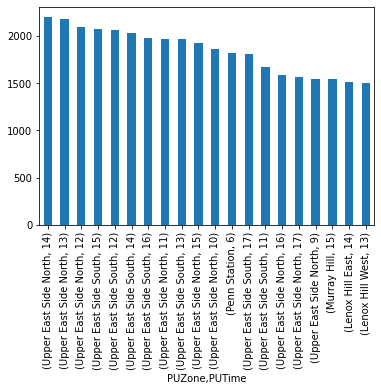

In [109]:
pt4 = df1.groupby(['PUZone','PUTime']).agg({'count':sum})
pt4 = pt4['count'].sort_values(ascending = False).head(20)
pt4.plot(kind='bar')
pt4

### 5. ¿Cuál es el número de pasajeros promedio por viaje?
 RTA: 1.23 pasajeros en promedio

In [110]:

pt5 = df1['passenger_count'].mean()
pt5

1.3641883303920044

### 6. ¿Qué recomendaciones darían para que un taxista tenga más ingresos?  

Recomendaciones para el taxi

Si quiere estar ocupado todo el día, pasarse por la zona de  Up East Side North, que es donde llaman más taxis (mas de 20.000 servicios al mes)

Si quiere los montos más grandes por carrera tiene que irse a Rossville con USD 123 en promedio por viaje

Por último, si quiere ganar más propinas, tiene que irse a el aeropuerto JFK, pero en promedio el destino de recogidas que más da es el aeropuerto de Newark

En general, un punto donde se pueden tener buenas propinas (promedio) y tiene un buen monto por carrera es el aeropuerto de Newark!!

Text(0.5, 1.0, '10 Most total amount pickups (average)')

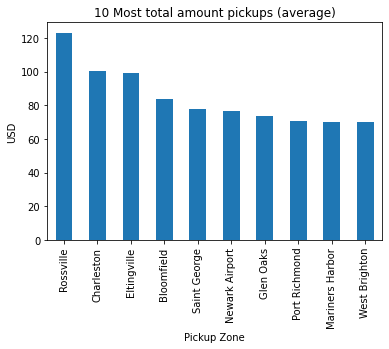

In [111]:
pt6 = df1.groupby(['PUZone']).agg({'total_amount':np.mean})
pt6 = pt6['total_amount'].sort_values(ascending = False).head(10)
pt6.plot(kind = "bar")
plt.ylabel("USD")
plt.xlabel("Pickup Zone")
plt.title("10 Most total amount pickups (average)")

### 7. ¿cuales son las zonas con más cobros por congestion?

Text(0.5, 1.0, '10 most congestion surcharge zones')

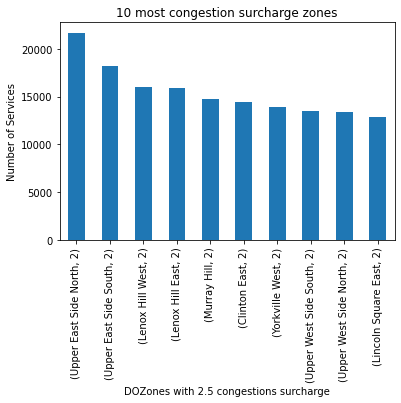

In [112]:
pt7 = df1.groupby(['DOZone','congestion_surcharge']).agg({'count':sum})
pt7_Total = pt7['count'].sort_values(ascending = False)
pt7 = pt7['count'].sort_values(ascending = False).head(10)
pt7.plot(kind = 'bar')
plt.xlabel("DOZones with 2.5 congestions surcharge")
plt.ylabel("Number of Services")
plt.title("10 most congestion surcharge zones")


In [113]:
pt7_Total 

DOZone                 congestion_surcharge
Upper East Side North  2                       21686
Upper East Side South  2                       18259
Lenox Hill West        2                       16011
Lenox Hill East        2                       15961
Murray Hill            2                       14750
                                               ...  
Bellerose              2                           2
Jamaica Bay            0                           1
Arden Heights          2                           1
Freshkills Park        0                           1
                       2                           1
Name: count, Length: 511, dtype: int64

In [114]:
fullData = geoData.merge(pt7_Total, left_on=['zone'], right_on=['DOZone'])
fullData.head(10)


,id,objectid,shape_leng,shape_area,zone,locationid,borough,geometry,count
0,nyu_2451_36743.1,1,0.116357,0.000782,Newark Airport,1,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",325
1,nyu_2451_36743.1,1,0.116357,0.000782,Newark Airport,1,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ...",32
2,nyu_2451_36743.2,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",1
3,nyu_2451_36743.4,4,0.043567,0.000112,Alphabet City,4,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",2870
4,nyu_2451_36743.4,4,0.043567,0.000112,Alphabet City,4,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",114
5,nyu_2451_36743.5,5,0.092146,0.000498,Arden Heights,5,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...",4
6,nyu_2451_36743.5,5,0.092146,0.000498,Arden Heights,5,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ...",1
7,nyu_2451_36743.7,7,0.107417,0.000390,Astoria,7,Queens,"MULTIPOLYGON (((-73.90414 40.76752, -73.90325 ...",1522
8,nyu_2451_36743.7,7,0.107417,0.000390,Astoria,7,Queens,"MULTIPOLYGON (((-73.90414 40.76752, -73.90325 ...",1075
9,nyu_2451_36743.8,8,0.027591,0.000027,Astoria Park,8,Queens,"MULTIPOLYGON (((-73.92334 40.77513, -73.92398 ...",12


Acá se presenta el mapa de calor, de las zonas con mayor cantidad de cobros por congestion de New York, las zonas mas oscuro corresponden a las zonas de la gráfia de barras anterior, donde se listan el top de zonas del ranking.

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.5, 1.0, 'Colorplet most congestions Zones')

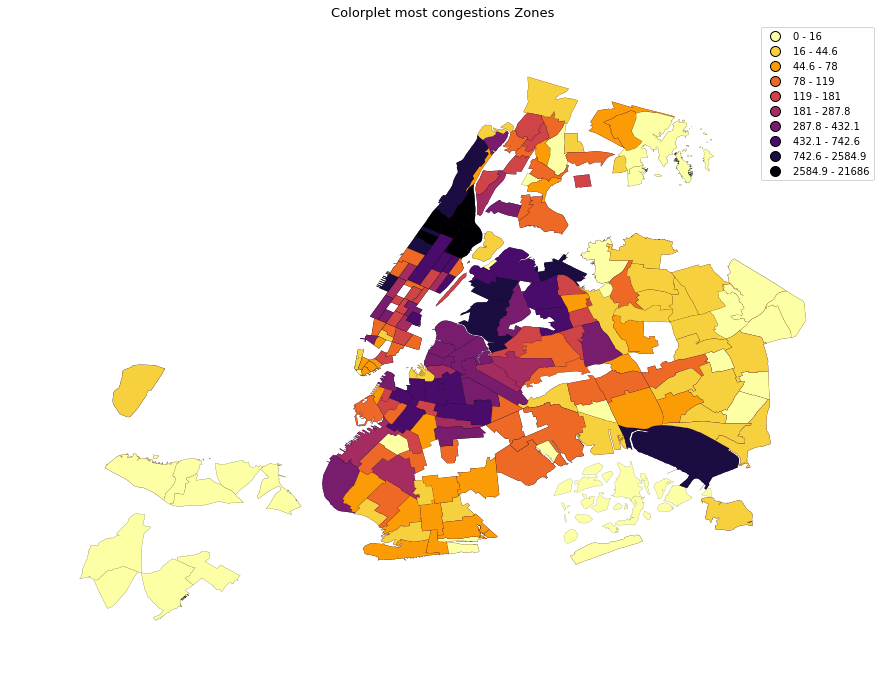

In [115]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['count'], k=10)

# Map
gplt.choropleth(fullData, 
    hue="count", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
)

ax.set_title('Colorplet most congestions Zones', fontsize=13)

### 8.¿Qué recomendaciones darían a la alcaldía de Nueva York, basado en los datos analizados de taxis, en cuanto a congestión vehicular? 

En esta Gráfica se ve un scatter plot, en el cual se relacionan 3 de las variables más destacadas a mostrar a la empresa, pues muestra las mayores zonas de tips por un total por zona, contrastando la cantidad total de viajes junto con el total del cargo del viaje.

Las recomendaciones para los taxis, está en elegir si desean ir a la zona de mayor viaes y propinas promedios, o si buscan destinos con cargos los cargos totales mas altos, pero la cantidad de viajes, es mas escasa. 

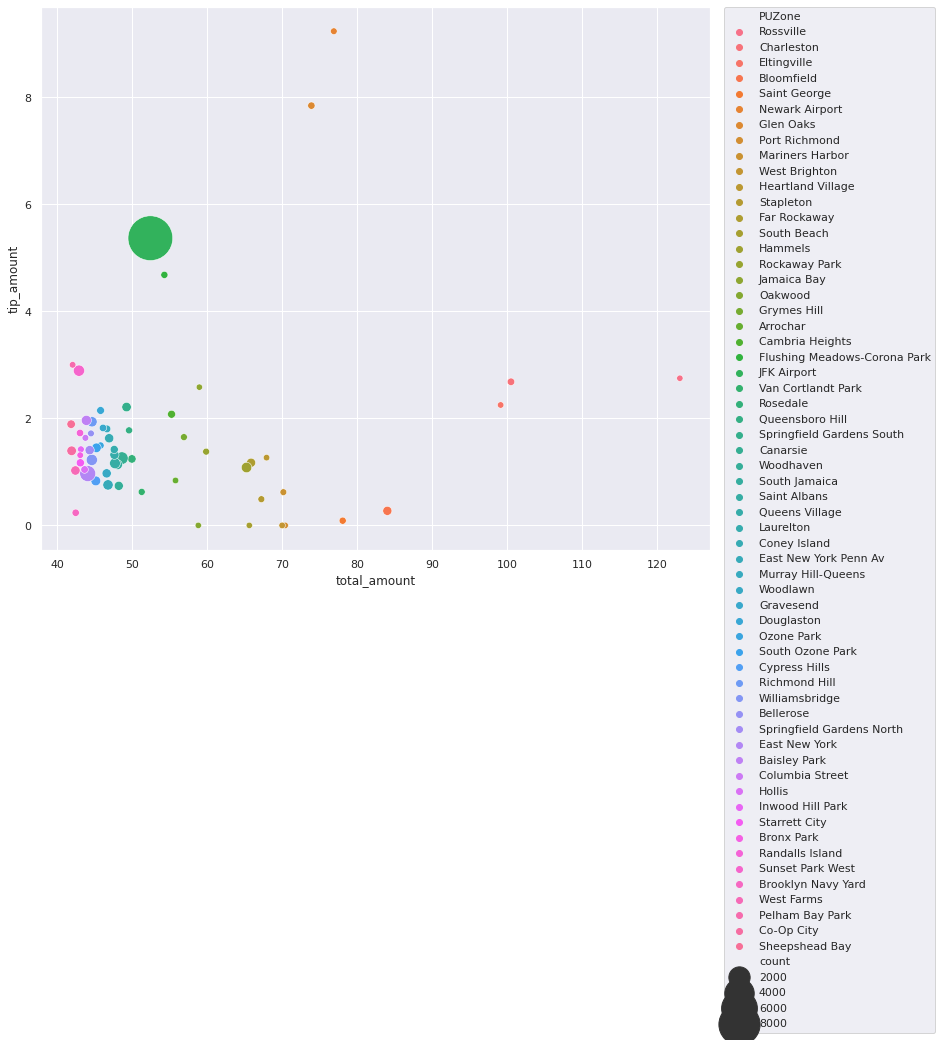

In [116]:
pt8tip = df1.groupby('PUZone', as_index=False).agg({'tip_amount':np.mean})
pt8amount = df1.groupby('PUZone', as_index=False).agg({'total_amount':np.mean})
pt8NOfServ = df1.groupby('PUZone', as_index=False).agg({'count':sum})


pt8a = pt8tip.set_index('PUZone').join(pt8amount.set_index('PUZone')).join(pt8NOfServ.set_index('PUZone'))
pt8a = pt8a.sort_values(by=['total_amount'],ascending = False).head(60)
#print(pt8a)
# use the scatterplot function to build the bubble map
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.scatterplot(data=pt8a, x="total_amount", y="tip_amount", size="count", sizes=(40, 2000),hue='PUZone')
#sns.move_legend(ax, "upper right", bbox_to_anchor=(1,1))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

